# 简介
1. Sklearn
2. 吴恩达视频
3. 随便学了一些老版本的keras解闷（没有详细的注释文字，准备tf出2.0之后直接学tf）

# 主要内容

## Sklearn

### 6 model常用属性和功能
sklearn的每一个model都有自己的一些属性和功能。

In [1]:
%config InlineBackend.figure_format = 'svg' #使图片成为矢量图
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression() #参数可以改变，但默认值就非常好
model.fit(data_X,data_y)
print(model.predict(data_X[:4,:]))

[30.00821269 25.0298606  30.5702317  28.60814055]


以上例子中`model.fit()`是model的一个功能，同时model还有自己的属性。

In [3]:
#y = 0.1x + 0.3
print(model.coef_) #Weights
print(model.intercept_) #bias

[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
36.49110328036103


上述例子表明了我们还可以输出model训练后的**权重**和**偏差值**

权重：`model.coef_`

偏差值：`model.intercept_`

In [4]:
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


通过`.get_params()`可以获取我们之前在model里定义的参数。如果未定义，则返回默认的参数值。

In [5]:
print(model.score(data_X,data_y))

0.7406077428649428


`.score(X,y)`输出对X的预测结果与y标签的匹配率，多少预测是正确的，多少事错误的。

这个函数使用的打分方法是$R^2\ coefficient\ of\ determination$

*PS:*

*$R^2\ coefficient\ of\ determination$是在线性回归模型里衡量预测模型输出结果的一种方法。（挖个坑，以后再了解了解）*

### 7 标准化
标准化是机器学习数据预处理里很重要的一步。

常见有两种标准化方法：
1. $$x=\frac{x-min}{max}$$
2. $$x=\frac{x-\mu}{\sigma}$$

吴恩达视频里也讲过，这里不再赘述。

下面是如何用sklearn实现标准化的例子。

In [6]:
from sklearn import preprocessing #导入数据预处理的包

a = np.array([[10,2.7,3.6],
             [-100,5,-2],
             [120,20,40]],dtype=np.float64)

print(a)
print(preprocessing.scale(a)) #实现的是第二种标准化

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


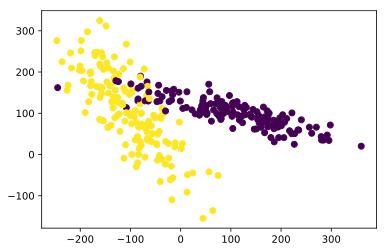

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#我们生成一些用于分类的随机数据
#300个数据，2个属性，(n_informative)2个相关属性
#设定了random_state后产生的随机数就固定了
X,y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,random_state=22,n_clusters_per_class=1,scale=100)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()



以上是我们得到的数据，注意这些数据的取值范围。

In [8]:
X = preprocessing.scale(X)
#还要另外一种压缩方法：
#X=preprocessing.minmax_scale(X,feature_range(-1,1))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
clf = SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.9666666666666667


以上模型的精确度大约是94%

接下来我们以不进行标准化的数据进行训练以做对比。

In [9]:
X,y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,random_state=22,n_clusters_per_class=1,scale=100)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
clf = SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))


0.4666666666666667


可见，数据的标准化对训练结果的影响非常大。

### 8 cross validation 交叉验证1


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9736842105263158


当数据集较小时，可以使用交叉验证，取数据集不同的部分做Test集来评价模型的预测结果。

下面我们用`cross_val_score`来实现交叉验证。

In [11]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
#cv表示交叉验证的次数。
print(scores)
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


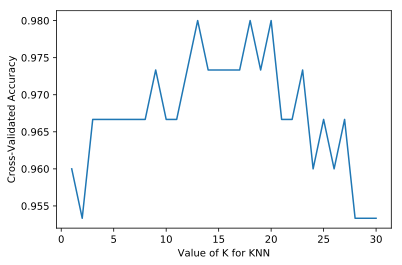

In [12]:
import matplotlib.pyplot as plt
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    #loss = -cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error')
    #上述这一行针对于回归问题
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#plt.xticks(k_range)
plt.show()

上面我们通过循环和可视化来改变超参数`n_neigbors`的值来寻找最优的k值。

这样的方法可以用于绝大部分超参数的选择。

### 9 cross validation 交叉验证2

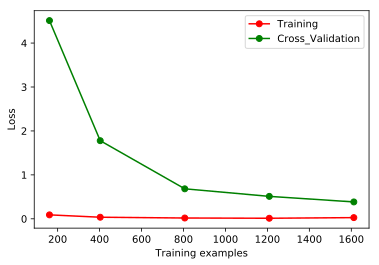

In [13]:
from sklearn.model_selection import learning_curve #学习曲线包
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

#learning_curve输出训练集大小train_sizes，
#train_loss输出训练损失函数随时间的波动变化
#train_sizes[]表示在哪些点记录输出数据（在曲线上画出点）
train_sizes,train_loss,test_loss = learning_curve(
    SVC(gamma=0.001),X,y,cv=10,scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])


train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',c='r',label='Training')
plt.plot(train_sizes,test_loss_mean,'o-',c='g',label='Cross_Validation')


plt.xlabel('Training examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

由上图可见，交叉验证的loss值随训练数据的增加而减少

如果我们改变`SVC()`的`gamma`值：

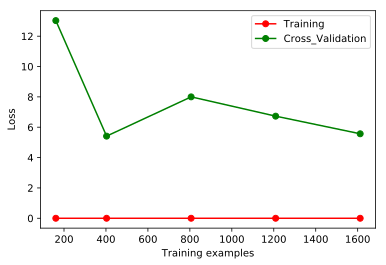

In [14]:
from sklearn.model_selection import learning_curve #学习曲线包
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

#learning_curve输出训练集大小train_sizes，
#train_loss输出训练损失函数虽时间的波动变化
#train_sizes[]表示在哪些点记录输出数据（在曲线上画出点）
train_sizes,train_loss,test_loss = learning_curve(
    SVC(gamma=0.01),X,y,cv=10,scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])


train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',c='r',label='Training')
plt.plot(train_sizes,test_loss_mean,'o-',c='g',label='Cross_Validation')


plt.xlabel('Training examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

由上图可以分析出，模型产生了过拟合，因为在训练数据上的loss值很小，然而在交叉验证集上的loss趋于稳定到一个较大的值。

### 10 cross validation 交叉验证3
这次的cross validation与之前的有所不同。之前的cross validation用于评估单个的表现。

而这次我们将把training和cross validation两条曲线全部plot上去进行分析。

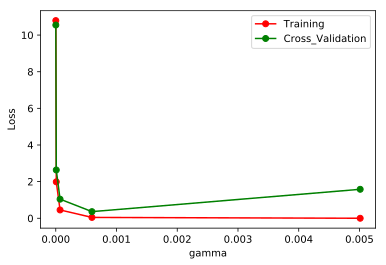

In [ ]:
from sklearn.model_selection import validation_curve #学习曲线包
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

#用于设置SVC的参数。
param_range = np.logspace(-6,-2.3,5)

#train_loss输出训练损失函数虽时间的波动变化
#train_sizes[]表示在哪些点记录输出数据（在曲线上画出点）
train_loss,test_loss = validation_curve(
    SVC(),X,y,param_name='gamma',param_range=param_range,cv=10,
    scoring='neg_mean_squared_error')

train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(param_range,train_loss_mean,'o-',c='r',label='Training')
plt.plot(param_range,test_loss_mean,'o-',c='g',label='Cross_Validation')


plt.xlabel('gamma')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

以上图表示train和cross validation的loss值随gamma的变化。

可见大致当`gamma=0.0006`的时候，模型表现最好，之后的曲线展现了模型过拟合的过程。

### 11 Save Model
保存model的方式有两种。
1. python自带的pickle
2. sklearn的joblib

In [ ]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X,y = iris.data, iris.target
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 方法一：pickle

In [ ]:
import pickle

#保存模型
with open('clf.pickle','wb') as f: #with语句自动关闭
    pickle.dump(clf,f)
    
#载入模型
with open('clf.pickle','rb') as f:
    clf2 = pickle.load(f)
    print(clf2.predict(X[0:1]))

#### 方法二：joblib

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf,'clf.pkl') #保存模型

clf3 = joblib.load('clf.pkl') #载入模型
print(clf3.predict(X[0:1]))

## Andrew Ng视频

### 3.1 目标定位
在了解目标检测前，我们需要先了解目标定位。

以包含汽车的图像为例。
图像分类的算法是通过遍历图片，判断图片中的对象是是否是汽车。而本节将学习的是另一个问题——定位分类问题。
这意味着我们不仅要用算法判断图片中是不是一辆汽车，还要在图片中标记出它的位置，用边框或红色方框把汽车圈起来。
之后将要了解的目标检测则是在存在多个对象的图片中应该如何检测它们并确定它们的位置。

定位分类问题中，我们使用的图片里通常只有一个较大的对象位于图片中间位置，我们要对它进行识别和定位。

图片分类的思路可以帮助学习分类定位，而对象定位的思路又有助于学习对象检测。

我们先从分类和定位开始。

以开发自动驾驶系统为例。
我们先设置4个标签：
1. 行人
2. 汽车
3. 摩托车
4. 背景

分类问题就回到之前的内容。

为了实现定位，我们需要让神经网络多输出几个单元组成边界框
![screenshots/1.png](screenshots/1.png)
这里约定：图片左上角坐标为$(0,0)$，右下角坐标为$(1,1)$，要想确定边界框的具体位置，需要指定红色方框的中心点，设为$(b_x,b_y)$，边界框的高度设为$b_h$，宽度设为$b_w$。因此训练集不仅要包含标签，还包含边界框的这4个数字，最后输出的不仅是一个分类标签，还要有那4个参数值。



那么我们该如何定义标签$y$来制作数据集呢？

这里我们定义**目标标签**$y$是这的一个向量：$$y=\begin{bmatrix} P_c \\ b_x \\ b_y \\ b_h \\ b_w  \\ c_1 \\ c_2 \\ c_3\end{bmatrix}$$
其中
1. $P_c$表示是否含有对象，如果对象不为背景，则$P_c=1$，否则为$0$
2. 当$P_c=1$时，$c_i$表示对象的类别。

以上面“雪中汽车”图为例，$$y=\begin{bmatrix} 1 \\ b_x \\ b_y \\ b_h \\ b_w \\ 0 \\ 1 \\ 0 \end{bmatrix}$$
$c_1,c_2,c_3$最多只有一个等于1，因为图片中只有一个对象。

如果图片中没有对象，则$P_c=0$，那么$y$向量的其他元素就没有意义。

以上这些数据构成了我们的训练集。

目标函数也需要做出改动，以上面的$y$标签为例，并采用平方误差策略。

$$
\begin{equation}
L(\hat{y},y)=
\left\{
\begin{array}{loss func}
\sum_i^8(\hat{y_i}-y_i)^2 & & if\ y_1=1 \\
(\hat{y_1}-y_1)^2 & & if\ y_1=0
\end{array}
\right.
\end{equation}
$$

通常在实际应用中，我们对$P_c$应用逻辑回归函数或平方误差，对边界框坐标应用平方误差或类似方法，对$c_i$和$softmax$函数可以应用对数损失函数并输出其中一个元素的值。

PS:
逻辑（对数）损失函数$$J(w,b)=-\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log \hat{y}^{(i)}+(1-y^{(i)})\log (1-\hat{y}^{(i)})\right]$$

### 3.2 特征点检测
上一节我们通过输出有关边框值的4个坐标来定位对象，这表明神经网络可以通过输出坐标值$(x,y)$来实现对目标特征的识别。

这里我们以构建一个人脸识别的应用为例。

我们希望算法可以给出人眼角的具体位置$(x,y)$，这样神经网络的最后一层就需要多输出两个数字$l_x$和$l_y$作为眼角的坐标。

如果我们希望输出更多的特征点坐标$l_{ix}$,$l_{iy}$，如更多嘴的特征点坐标来判断人物是否在微笑。那么我们在训练集中需要加入特征点的坐标值，然后用神经网络输出脸部关键特征点的位置。

假设我们设定了64个特征点，那么我们最后输出应该是这样一个结果$$y=\begin{bmatrix}y_1\\ l_{1x}\\ l_{1y} \\ \vdots \\ l_{64x} \\ l_{64y} \end{bmatrix}$$
其中$y_1$表示是否有人脸。

这个输出一共有129个元素。通过这样的方式实现对图片的人脸检测和定位。这便构成了一个识别脸部标签的基本构造模块。

对于构造人物姿态检测的模型同理可得。

### 3.3 目标检测
本节学习的是如果通过卷积网络进行对象检测，采用基于滑动窗口的目标检测算法。

以构建一个汽车检测算法为例。

步骤是
1. 创建一个标签训练集，如下图所示![screenshots/2.png](screenshots/2.png)
利用这些图片构建卷积神经网络模型，然后再输入适当剪切过的图像，查看网络输出的y值。卷积网络训练完后便可用于实现滑动窗口目标检测。
2. 首先选定一个特定大小的窗口。![screenshots/3.png](screenshots/3.png)
接着将窗口输入网络，卷积网络开始判断窗口（红色方框）内有没有汽车，然后窗口会滑动（步长恒定），继续处理第二个图像。依次重复操作，直至整张图片都被检测完。
3. 之后我们改变窗口大小，重复第2步

这个算法很明显的缺点是计算成本过大。之前人们使用简单线性分类器而不是卷积网络，计算量可以接受，但卷积网络运行单个分类任务的成本却高得多。

而且，除非使用小粒度或极小步长，否则无法准确定位图片中的对象。

幸运的是，计算成本问题已有很好的解决方案，见下节。

### 3.4 卷积的滑动窗口实现
本节介绍如何在卷积层上应用滑动窗口的算法。

首先要把神经网络的全连接层转化为卷积层。
![screenshots/4.png](screenshots/4.png)
如上图所示，在原本应当构建全连接层时，用相同大小的400个卷积层卷积这样输出维度就是$1\times1\times400$，此时它不是一个含400个节点的全连接层，而是一个输出层。

然后再用$1\times1$卷积，最后再用$1\times1$过滤器处理，得到$softmax$激活值。

接下来我们看看如何通过卷积实现滑动窗口对象检测算法。
![screenshots/5.png](screenshots/5.png)
以训练集使用$14\times14\times3$的图片为例，当测试集图片大小为$16\times16\times3$时，模型先检测左上角的$14\times14$的区域得到输出，假设步长为2，则下一步检测右上角$14\times14$的区域再得到输出，然后是左下角、右下角。

不难发现这4次运算中，很多次都是重复的。为了解决这个问题，我们可以进行如下操作。
![screenshots/6.png](screenshots/6.png)
这样，最后那个$2\times2\times4$的左上角方块即是原图像左上角那个$14\times14$的区域的输出，其他3个方块同理。这样计算量就大大减少。

同理可以将这种做法扩展到更大的图片上。这样我们在用卷积网络实现滑动窗口检测算法时，效率大大提升。

### 3.5 Bounding Box预测
上节所讲述的卷积网络实现滑动窗口的效率已经非常高，但它仍然**存在问题：不能输出最精准的边界框**，本节将会介绍输出精准边界框的方法。

有一个能得到更精准边界框的算法是[**YOLO(you only look once)算法**](https://arxiv.org/abs/1506.02640)

假设输入图像是$100\times100$，然后我们在图像上放一个网格（$3\times3$），如下图所示。![screenshots/7.png](screenshots/7.png)

算法的基本思路是：
使用图像分类和定位算法，然后将算法应用到每个网格里。

具体来说，在训练集里，每个网格需要指定一个标签y（8维向量），若无对象，则$y_1=0$。上图中有两个对象（汽车），YOLO算法需要计算出对象的中点，然后将它们分配给中点所在的格子里。于是左边那辆黑车被分配给第4个网格，右边那辆银色车则被分给第6个网格。所以即使中间那个格子同时有两辆车的一部分，它的$y_1$值仍然为0。而对于有对象的格子，$y=\begin{bmatrix} 1 \\ b_x \\ b_y \\ b_h \\ b_w \\ 0 \\ 1 \\ 0 \end{bmatrix}$
    
那么这张图片总的输出尺寸就是$3\times3\times8$。我们在设计卷积网络时就需要使输出为$3\times3\times8$。
    
PS:一个格子存在多个对象的问题稍后讨论
    
这个算法的运行速度非常快，可以达到实时识别的程度。

下面介绍如何编码$b_x,b_y,b_h,b_w$
我们以上图右边的银色车为例，$y=\begin{bmatrix} 1 \\ b_x=0.4 \\ b_y=0.3 \\ b_h=0.5 \\ b_w=0.9 \\ 0 \\ 1 \\ 0 \end{bmatrix}$，我们约定网格左上角坐标为(0,0)，右下角坐标为(1,1)，$b_x,b_y,b_h,b_w$是相对格子尺度的比例，所以$b_x,b_y$必须介于0到1之间，但$b_h,b_w$的值可能大于1。虽然YOLO论文给出了另外的一种编码方式，但上述使用的这种编码方式仍然不失合理性。

### 3.6 交并比
如何判断对象检测算法运作是否良好呢？本节将会介绍交并比函数(Intersection over Union)，它可以用于评价对象定位算法是否精准。

**交并比函数（IoU）**计算的是预测的边界框与数据集标定的边界框的**交集**与**并集**之比，一般认为当$IoU\geq0.5$即为检测正确（这个阈值可以适当提高）

IoU这个概念在下一节非极大值抑制中将得到应用。

### 3.7 非极大值抑制
算法在运行过程中会对同一个对象检测出多次，**非极大值抑制**可以保证算法对每个对象只检测一次。

以3.5节中车辆检测的图片为例，这次使用的网格是$19\times19$，图中两辆车只有一个中点，故理论上应该只有一个格子作出有车的预测（车的中点在这个格子里）。但由于网格过于密集，算法运行时会认为周围的格子是汽车中点所在的格子。

在对这361个格子运行算法时，会出现多个重叠度很高的结果，非最大值抑制的作用就是清理多余的检测结果，这样一辆车只检测一次，而不是每辆车触发多次检测。

大致来说，抑制算法首先会看每个检测结果相关的概论$p_c$（实际上是$p_c\times c_1\times c_2 \times c_3$），找到概论最大的那个，然后判定这个是最可靠的检测，然后高亮标记。

接下来算法审视其他检测结果，所有与之前判断的最优结果有**很高IoU**的结果就会被抑制。最后算法只输出最可靠的检测结果。

从细节出发，
1. 首先在361个格子上运行一遍算法，为了简化，我们只检测汽车，即输出的结果为$y=\begin{bmatrix} p_c \\ b_x \\ b_y \\ b_h \\ b_w \end{bmatrix}$,我们会得到$19\times19\times5$的输出。
2. 然后抛弃输出中$p_c\leq 0.6$的边界框
3. 当还有剩余边界框时，执行以下步骤：
    - 在剩下的边界框中，我们需要选择$p_c$最高的边界框，然后将其输出成预测结果（高亮显示）
    - 接着抛弃任何没有达到输出标准的边界框，
    
如果有多个需要检测的对象，如3个时，最好的方法是独立进行三次非最大值抑制，对每个输出类别都做一次。

### 3.8 Anchor Boxes
目前为止，对象检测中存在的一个问题是每个格子只能检测出一个对象，如果想让其检测出多个对象，可以使用**anchor box**这个概念。

以下图为例，
![screenshots/8.png](screenshots/8.png)
图中人和车的中点几乎落在同一个格子。

对于这个图片，如果输出标签为$y=\begin{bmatrix} p_c \\ b_x \\ b_y \\ b_h \\ b_w \\ c_1 \\ c_2 \\ c_3 \end{bmatrix}$将无法输出检测结果，我们必须从两个检测结果中选一个。

而anchor box的思路是，预先定义两个不同形状的anchor box
![screenshots/9.png](screenshots/9.png)然后把预测结果和这两个anchor box关联起来，一般来说，anchor box的数量可能比较多。（anchor box 1对应行人，anchor box 2对应汽车）

此时我们的输出标签$y$将变为$y=\begin{bmatrix} p_c \\ b_x \\ b_y \\ b_h \\ b_w \\ c_1 \\ c_2 \\ c_3 \\ p_c \\ b_x \\ b_y \\ b_h \\ b_w \\ c_1 \\ c_2 \\ c_3 \end{bmatrix}$，前8个元素表征与anchor box 1相关的输出，后8个元素表征与anchor box 2相关的输出。

总而言之，

之前，对于训练集的每个图片，将其中的对象按照中点的位置分配到网格中，于是$3\times3$网格输出大小为$3\times3\times8$。

现在，每个对象和之前一样分配到格子中去，但同时还分配到一个和对象形状IoU最高的anchor box中去。这样我们的目标标签的编码方式就是**一个标签对(网格，anchor box)**，所有现在输出y就是$3\times3\times16$

以包含汽车和行人的图为例，对于第8个格子，输出$y=\begin{bmatrix} 1 \\ b_x \\ b_y \\ b_h \\ b_w \\ 1 \\ 0 \\ 0 \\ - \\ 1 \\ b_x \\ b_y \\ b_h \\ b_w \\ 0 \\ 1 \\ 0 \end{bmatrix}$，而对于只有汽车的格子，输出标签$y=\begin{bmatrix} 0 \\ ? \\ ? \\ ? \\ ? \\ ? \\ ? \\ ? \\ - \\ 1 \\ b_x \\ b_y \\ b_h \\ b_w \\ 0 \\ 1 \\ 0 \end{bmatrix}$，后8个元素为anchor box 2的分量。

需要注意的是，如果有2个anchor box，但一个格子中有3个对象，这种情况算法就无法处理；还有一种无法处理的情况是2个anchor box相似。

anchor box适合处理那些具有特征性很强对象的图片。anchor box设定多采用手工方式设定。

更好的方式在后期YOLO算法论文中被提出——K平均算法，可以对两类对象聚类，选择最具代表性的一组anchor box。

### 3.9 YOLO算法
本节我们将本章学习到的内容整合，实现一个YOLO算法模型。

首先先要构建训练集。假设模型用于分辨3类对象，有2个anchor box，图片上加的网格大小为$3\times3$，那么标签y的大小就应该是$3\times3\times16$。

如果有一个网格中的对象与anchor box 2的IoU较大，那么这个网格的标签$y=\begin{bmatrix} 0 \\ ? \\ ? \\ ? \\ ? \\ ? \\ ? \\ ? \\ - \\ 1 \\ b_x \\ b_y \\ b_h \\ b_w \\ 0 \\ 1 \\ 0 \end{bmatrix}$。以上就构成了训练集。

然后我们就可以用卷积网络对其进行训练。
![screenshots/10.png](screenshots/10.png)
并做出预测。

最后需要应用一下非最大值抑制。先抛弃$p_c$值较小的结果框，然后对于每个类别，分别进行非最大值抑制。

以上，就是YOLO对象检测算法的一个例子。

### 3.10 RPN网络
`候选区域`这个概念被证明在目标检测领域是有效的。

[R-CNN算法](https://arxiv.org/abs/1311.2524)——带区域的卷积网络。这个算法尝试着选出一些区域，在这些区域上运行CNN分类器是有意义的。所以这里不再针对每个滑动窗口运行检测算法，而是在少数窗口上运行CNN。

用于选出区域的算法是图像分割算法。
![screenshots/11.png](screenshots/11.png)
最右的图片是图像分割算法的结果，独立的色块区域会有更大的可能被应用图像检测算法。例如选择2000个独立色块区域，然后在这些区域上运行目标检测算法，这将会减少运行的时间。

从现在的角度看，R-CNN算法的运行时间仍然很慢。所以最基本的思路是：用某种算法获取检测区域，然后在区域上运用目标算法。

由于它运行速度太慢，Ross Girshik又提出了[Fast R-CNN算法](https://arxiv.org/abs/1504.08083)，它的过程与3.4节的过程大致相似。然而事实证明，Fast R-CNN算法的其中一个问题是得到候选区域的聚类步骤仍然太慢，于是另一个研究组提出了[Faster R-CNN]()，使用了卷积网络而不是图像分割算法来选取区域，不过大多数时候Faster R-CNN仍然比YOLO算法慢很多。

概括来说，候选区域的概念在计算机视觉领域的影响力相当大。

## Keras

### 4 Regression 回归

In [ ]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

X = np.linspace(-1,1,200)
np.random.shuffle(X)
Y = 0.5*X + 2 + np.random.normal(0,0.05,(200,))

plt.scatter(X,Y)
plt.show()

In [ ]:
X_train,Y_train = X[:160],Y[:160]
X_test,Y_test = X[160:],Y[160:]

In [ ]:
model = Sequential()
model.add(Dense(input_dim=1,units=1))


In [ ]:
model.compile(loss='mse',optimizer='sgd')

In [ ]:
print('Training ------------')

for step in range(301):
  cost = model.train_on_batch(X_train,Y_train)
  if step % 100 == 0:
    print('train cost:',cost)

In [ ]:
print('\nTesting -----------')
cost = model.evaluate(X_test,Y_test,batch_size=40)
print('test cost:',cost)
W,b = model.layers[0].get_weights()
print('Weights=',W,'\nbiases=',b)

Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test,c='r')
plt.plot(X_test,Y_pred)
plt.show()

### 5 Classifier 分类

In [ ]:
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import RMSprop

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train)
X_train = X_train.reshape(X_train.shape[0],-1)/255
X_test = X_test.reshape(X_test.shape[0],-1)/255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

print('----------------------------')
print(X_train)

In [ ]:
model = Sequential([
    Dense(32,input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])

In [ ]:
rmsprop = RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

In [ ]:
model.compile(
    optimizer = rmsprop,
    
    loss = 'categorical_crossentropy',
    metrics = ['accuracy',],
)

In [ ]:
print('Training--------')
model.fit(X_train,y_train,nb_epoch=2,batch_size=32)

In [ ]:
print('\nTesting--------')
loss,accuracy = model.evaluate(X_test,y_test)

In [ ]:
print('test loss:',loss)
print('test accuracy:',accuracy)

### CNN卷积神经网络

In [ ]:
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(-1,1,28,28)
X_test = X_test.reshape(-1,1,28,28)
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

model = Sequential()

model.add(Conv2D(
    filters=32,
    kernel_size=(5,5),
    padding='same',
    input_shape=(1,28,28),
))
model.add(Activation('relu'))

model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding='same',
    
))

model.add(Conv2D(64,(5,5),padding='same',))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2),padding='same',))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


adam = Adam(lr=1e-4)

model.compile(optimizer=adam,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print('Training---------------------------------------------------------')

model.fit(X_train,y_train,epochs=1,batch_size=32,)

print('\nTesting--------------------------------------------------------')
loss,accuracy = model.evaluate(X_test,y_test)

print('\ntest loss:',loss)
print('\ntest accuracy:',accuracy)